# Partie I : Modèle Logit binaire

Le partie I du projet consiste à réaliser un modèle de régression logistique à partir d'une table de données.
La table de données contient des informations de sinistre  concernant des individus.
Ici, le projet consiste à réaliser un modèle de régression logistique censé déterminer la survenue d'un sinistre  ou non sur une police d'assurance (ici la variable Expdays sur la durée d'exposition de contrat)

Notre Table de données contient 100022 individus et 20 variables :
- PolNum     :     Numéro de la police est une variable numerique 
- CalYear    :     Année calendaire de souscription est une variable numerique constante
- Gender     :     Genre du conducteur (Homme/Femme) est une variable qualitative
- Type       :     Type de Vehicule une variable qualitative
- Category   :     Categorie du vehiculeune variable qualitative
- Occupation :     Profession une variable qualitative
- Age        :     Age du conducteur est une variable quantitative
- Group1     :     Groupe du vehicule est une variable quantitative
- Bonus      :     Bonus-Malus est une variable quantitative
- Poldur     :     Ancienneté du contrat est une variable quantitative
- Value      :     Valeur du vehicule est une variable quantitative
- Adind      :     Indicateur d'une garantie dommages est une variable categorielle binaire
- Subgroup2  :     Sous-region d'habitation est une variable qualitative
- Group2     :     Region d'habitation est une variable qualitative
- Density    :     Densité de la population est une variable quantitative
- Expdays    :     Exposition en jours est une variable quantitative
- Nb1        :     Nombre de sinistres RC Materiels est une variable de comptage
- Nb2        :     Nombre de sinistre RC corporels  est une variable de comptage
- Surv1      :     Survenance de sinistres RC Materiels est une variable binaire
- Surv2      :     Survenance de sinistres RC Corporels est une variable binaire

    

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sm
import scipy.stats as sc
import statsmodels.api as st
from statsmodels.formula.api import ols

In [2]:
Sinistre = pd.read_excel('base.xlsx')

In [3]:
Sinistre_Quant = Sinistre.drop(['Adind','Id','PolNum','CalYear','Gender','Type','Category','Occupation','SubGroup2','Group2','Nb1','Nb2','Surv1','Surv2'],axis=1)

In [4]:
Sinistre_Quant

,Age,Group1,Bonus,Poldur,Value,Density,Exppdays
0,25,18,90,3,15080,72.012883,365
1,20,11,30,2,22370,39.550411,365
2,42,11,150,0,39650,169.529148,365
3,21,5,0,0,12600,58.894688,365
4,33,12,30,10,9065,109.631885,365
5,26,13,40,7,27335,47.982698,365
6,20,7,80,13,7710,77.737385,365
7,29,3,-20,12,8965,272.966995,365
8,31,3,-40,10,21030,251.432848,355
9,35,7,120,1,19995,144.998902,365


## Analyse exploratoire Quantitative

In [5]:
Sinistre_Quant.describe()

,Age,Group1,Bonus,Poldur,Value,Density,Exppdays
count,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000,100021.000000
mean,41.122514,10.692625,-6.921646,5.470781,16454.675268,117.159270,327.588007
std,14.299349,4.687286,48.633165,4.591194,10506.742732,79.500907,73.564636
min,18.000000,1.000000,-50.000000,0.000000,1000.000000,14.377142,91.000000
25%,30.000000,7.000000,-40.000000,1.000000,8380.000000,50.625783,340.000000
50%,40.000000,11.000000,-30.000000,4.000000,14610.000000,94.364623,365.000000
75%,51.000000,14.000000,10.000000,9.000000,22575.000000,174.644525,365.000000
max,75.000000,20.000000,150.000000,15.000000,49995.000000,297.385170,365.000000


(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

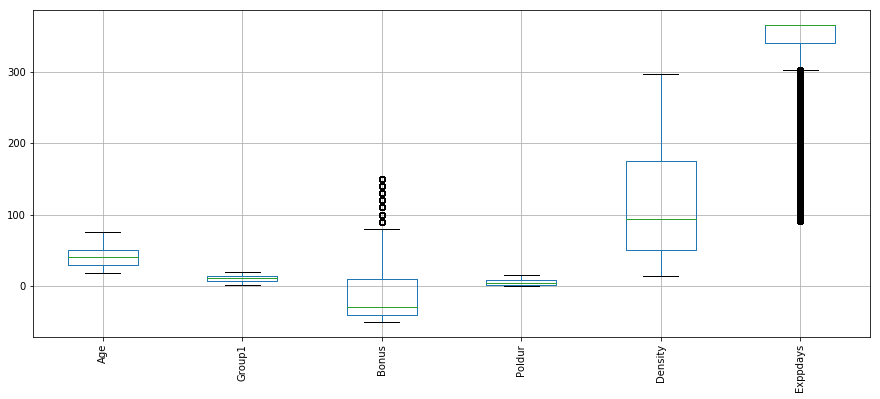

In [6]:
plt.subplots(figsize=(15,6))
Sinistre_Quant.boxplot(column =['Age','Group1','Bonus','Poldur','Density','Exppdays'])
plt.xticks(rotation=90)

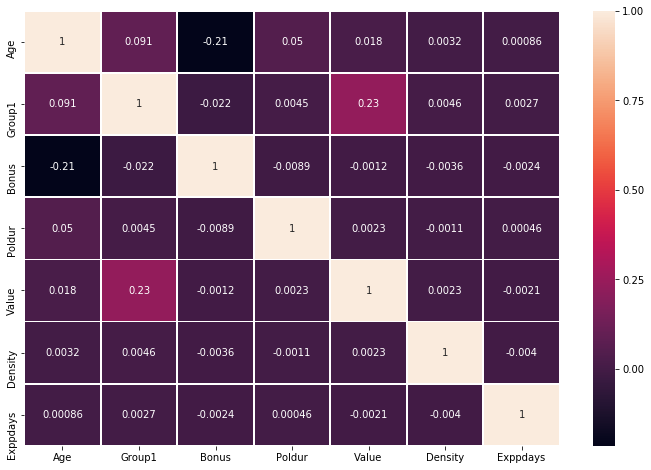

In [7]:
plt.subplots(figsize =(12,8))
sm.heatmap(Sinistre_Quant.corr(),linewidth=0.75, annot=True)

In [8]:
Sinistre_Quant_lm = ols('Surv1 ~ Age+Group1+Bonus+Poldur+Value+Density+Exppdays',
                 data=Sinistre).fit()

In [9]:
resultat = st.stats.anova_lm(Sinistre_Quant_lm, type = 1)
resultat

,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,278.370588,278.370588,2848.129737,0.000000e+00
Group1,1.0,107.297495,107.297495,1097.807027,1.980280e-239
Bonus,1.0,409.083797,409.083797,4185.513050,0.000000e+00
Poldur,1.0,10.909319,10.909319,111.617956,4.471884e-26
Value,1.0,0.081053,0.081053,0.829284,3.624819e-01
Density,1.0,129.847005,129.847005,1328.520798,5.720155e-289
Exppdays,1.0,59.406378,59.406378,607.812320,8.420350e-134
Residual,100013.0,9775.073530,0.097738,NaN,NaN


## Analyse Exploratoire Qualitative

In [10]:
Sinistre_Quali = Sinistre.drop(Sinistre_Quant,axis =1)
Sinistre_Qualitative =Sinistre_Quali.drop(['Id','PolNum','CalYear','Adind','SubGroup2','Group2','Nb1','Nb2','Surv1','Surv2'],axis=1)
Sinistre_Qualitative

,Gender,Type,Category,Occupation
0,Male,C,Large,Employed
1,Male,E,Large,Employed
2,Female,E,Large,Unemployed
3,Female,C,Medium,Housewife
4,Female,D,Large,Employed
5,Female,D,Small,Employed
6,Female,C,Small,Unemployed
7,Female,B,Medium,Employed
8,Male,E,Medium,Unemployed
9,Male,D,Medium,Employed


In [11]:
from scipy.stats import chi2_contingency
a = pd.crosstab(Sinistre_Quali['Nb2'],Sinistre_Quali['Surv2'])

chi2_contingency(a)



(100020.99999999999, 0.0, 3, array([[9.12119977e+04, 4.30300227e+03],
        [4.14257076e+03, 1.95429240e+02],
        [1.54701813e+02, 7.29818738e+00],
        [5.72969676e+00, 2.70303236e-01]]))

## Recodage des variables

In [12]:
TrancheAge = pd.cut(Sinistre['Age'], 6)
Sinistre['TrancheAge'] = TrancheAge
#Sinistre[['TrancheAge','Surv1']].groupby(['TrancheAge'], as_index=False).sum().sort_values(by='TrancheAge', ascending=True)
Sinistre

,Id,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,...,Adind,SubGroup2,Group2,Density,Exppdays,Nb1,Nb2,Surv1,Surv2,TrancheAge
0,1,200114978,2009,Male,C,Large,Employed,25,18,90,...,0,L46,L,72.012883,365,1,0,1,0,"(17.943, 27.5]"
1,2,200114994,2009,Male,E,Large,Employed,20,11,30,...,1,O38,O,39.550411,365,1,0,1,0,"(17.943, 27.5]"
2,3,200115001,2009,Female,E,Large,Unemployed,42,11,150,...,0,Q28,Q,169.529148,365,2,0,1,0,"(37.0, 46.5]"
3,4,200115011,2009,Female,C,Medium,Housewife,21,5,0,...,1,L6,L,58.894688,365,1,0,1,0,"(17.943, 27.5]"
4,5,200115015,2009,Female,D,Large,Employed,33,12,30,...,0,N4,N,109.631885,365,2,0,1,0,"(27.5, 37.0]"
5,6,200115016,2009,Female,D,Small,Employed,26,13,40,...,1,N16,N,47.982698,365,1,0,1,0,"(17.943, 27.5]"
6,7,200115023,2009,Female,C,Small,Unemployed,20,7,80,...,0,Q65,Q,77.737385,365,1,0,1,0,"(17.943, 27.5]"
7,8,200115043,2009,Female,B,Medium,Employed,29,3,-20,...,0,R19,R,272.966995,365,1,0,1,0,"(27.5, 37.0]"
8,9,200115048,2009,Male,E,Medium,Unemployed,31,3,-40,...,1,R9,R,251.432848,355,1,0,1,0,"(27.5, 37.0]"
9,10,200115063,2009,Male,D,Medium,Employed,35,7,120,...,1,Q22,Q,144.998902,365,1,0,1,0,"(27.5, 37.0]"


### Encodage Variable Gender

In [13]:
# integer encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Sinistre['Gender'])
print(integer_encoded)

[1 1 0 ... 1 0 0]


In [14]:
Sinistre['Gender'] =integer_encoded
Sinistre['Gender'] 



0         1
1         1
2         0
3         0
4         0
5         0
6         0
7         0
8         1
9         1
10        1
11        0
12        0
13        1
14        1
15        0
16        1
17        0
18        1
19        1
20        1
21        1
22        0
23        0
24        0
25        1
26        1
27        0
28        0
29        1
         ..
99991     0
99992     0
99993     1
99994     1
99995     0
99996     0
99997     1
99998     0
99999     0
100000    1
100001    1
100002    1
100003    0
100004    0
100005    1
100006    1
100007    1
100008    1
100009    0
100010    0
100011    1
100012    0
100013    0
100014    0
100015    1
100016    1
100017    1
100018    1
100019    0
100020    0
Name: Gender, Length: 100021, dtype: int32

### Encodage Variable Occupation

In [15]:
# integer encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
b = label_encoder.fit_transform(Sinistre['Occupation'])
print(integer_encoded)
Sinistre['Occupation'] = b
Sinistre['Occupation']

[1 1 0 ... 1 0 0]


0         0
1         0
2         4
3         1
4         0
5         0
6         4
7         0
8         4
9         0
10        0
11        1
12        4
13        4
14        0
15        0
16        4
17        4
18        3
19        0
20        0
21        3
22        4
23        1
24        0
25        1
26        0
27        1
28        1
29        3
         ..
99991     2
99992     3
99993     0
99994     1
99995     0
99996     0
99997     0
99998     4
99999     4
100000    2
100001    0
100002    0
100003    1
100004    3
100005    1
100006    3
100007    0
100008    3
100009    2
100010    4
100011    3
100012    1
100013    3
100014    1
100015    2
100016    1
100017    2
100018    0
100019    2
100020    2
Name: Occupation, Length: 100021, dtype: int32

In [16]:
Sinistre['Occupation'] = Sinistre['Occupation'].apply(lambda x: 1 if x == 0 else 0)
Sinistre['Occupation']
Sinistre
#Sinistre.drop(['Profession','Occupation','TrancheAge','Group1','SubGroup2','Group2','Nb1','Nb2','Surv2','Type',''],axis=1)

,Id,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,...,Adind,SubGroup2,Group2,Density,Exppdays,Nb1,Nb2,Surv1,Surv2,TrancheAge
0,1,200114978,2009,1,C,Large,1,25,18,90,...,0,L46,L,72.012883,365,1,0,1,0,"(17.943, 27.5]"
1,2,200114994,2009,1,E,Large,1,20,11,30,...,1,O38,O,39.550411,365,1,0,1,0,"(17.943, 27.5]"
2,3,200115001,2009,0,E,Large,0,42,11,150,...,0,Q28,Q,169.529148,365,2,0,1,0,"(37.0, 46.5]"
3,4,200115011,2009,0,C,Medium,0,21,5,0,...,1,L6,L,58.894688,365,1,0,1,0,"(17.943, 27.5]"
4,5,200115015,2009,0,D,Large,1,33,12,30,...,0,N4,N,109.631885,365,2,0,1,0,"(27.5, 37.0]"
5,6,200115016,2009,0,D,Small,1,26,13,40,...,1,N16,N,47.982698,365,1,0,1,0,"(17.943, 27.5]"
6,7,200115023,2009,0,C,Small,0,20,7,80,...,0,Q65,Q,77.737385,365,1,0,1,0,"(17.943, 27.5]"
7,8,200115043,2009,0,B,Medium,1,29,3,-20,...,0,R19,R,272.966995,365,1,0,1,0,"(27.5, 37.0]"
8,9,200115048,2009,1,E,Medium,0,31,3,-40,...,1,R9,R,251.432848,355,1,0,1,0,"(27.5, 37.0]"
9,10,200115063,2009,1,D,Medium,1,35,7,120,...,1,Q22,Q,144.998902,365,1,0,1,0,"(27.5, 37.0]"


### Encodage Variable Category

In [17]:
# integer encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
b = label_encoder.fit_transform(Sinistre['Category'])
print(integer_encoded)
Sinistre['Category'] = b
Sinistre['Category']

[1 1 0 ... 1 0 0]


0         0
1         0
2         0
3         1
4         0
5         2
6         2
7         1
8         1
9         1
10        2
11        0
12        1
13        2
14        2
15        2
16        2
17        0
18        2
19        0
20        2
21        1
22        0
23        1
24        2
25        1
26        0
27        1
28        1
29        2
         ..
99991     0
99992     0
99993     0
99994     2
99995     2
99996     1
99997     0
99998     0
99999     1
100000    1
100001    0
100002    1
100003    0
100004    0
100005    1
100006    1
100007    2
100008    2
100009    0
100010    1
100011    0
100012    1
100013    1
100014    1
100015    0
100016    1
100017    0
100018    2
100019    0
100020    0
Name: Category, Length: 100021, dtype: int32

In [18]:


Sinistre['Category'] = Sinistre['Category'].apply(lambda x: 1 if x == 0 else 0)
Sinistre['Category']
Sinistre


,Id,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,...,Adind,SubGroup2,Group2,Density,Exppdays,Nb1,Nb2,Surv1,Surv2,TrancheAge
0,1,200114978,2009,1,C,1,1,25,18,90,...,0,L46,L,72.012883,365,1,0,1,0,"(17.943, 27.5]"
1,2,200114994,2009,1,E,1,1,20,11,30,...,1,O38,O,39.550411,365,1,0,1,0,"(17.943, 27.5]"
2,3,200115001,2009,0,E,1,0,42,11,150,...,0,Q28,Q,169.529148,365,2,0,1,0,"(37.0, 46.5]"
3,4,200115011,2009,0,C,0,0,21,5,0,...,1,L6,L,58.894688,365,1,0,1,0,"(17.943, 27.5]"
4,5,200115015,2009,0,D,1,1,33,12,30,...,0,N4,N,109.631885,365,2,0,1,0,"(27.5, 37.0]"
5,6,200115016,2009,0,D,0,1,26,13,40,...,1,N16,N,47.982698,365,1,0,1,0,"(17.943, 27.5]"
6,7,200115023,2009,0,C,0,0,20,7,80,...,0,Q65,Q,77.737385,365,1,0,1,0,"(17.943, 27.5]"
7,8,200115043,2009,0,B,0,1,29,3,-20,...,0,R19,R,272.966995,365,1,0,1,0,"(27.5, 37.0]"
8,9,200115048,2009,1,E,0,0,31,3,-40,...,1,R9,R,251.432848,355,1,0,1,0,"(27.5, 37.0]"
9,10,200115063,2009,1,D,0,1,35,7,120,...,1,Q22,Q,144.998902,365,1,0,1,0,"(27.5, 37.0]"


### Encodage Variable Type

In [19]:
# integer encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
b = label_encoder.fit_transform(Sinistre['Type'])
print(integer_encoded)
Sinistre['Type'] = b
Sinistre['Type']

[1 1 0 ... 1 0 0]


0         2
1         4
2         4
3         2
4         3
5         3
6         2
7         1
8         4
9         3
10        2
11        0
12        0
13        3
14        3
15        0
16        3
17        3
18        0
19        3
20        1
21        2
22        4
23        3
24        1
25        5
26        3
27        1
28        0
29        2
         ..
99991     4
99992     1
99993     0
99994     3
99995     3
99996     3
99997     2
99998     0
99999     0
100000    2
100001    4
100002    1
100003    1
100004    3
100005    2
100006    3
100007    1
100008    5
100009    2
100010    0
100011    4
100012    1
100013    4
100014    0
100015    1
100016    5
100017    4
100018    2
100019    3
100020    2
Name: Type, Length: 100021, dtype: int32

In [20]:
Sinistre['Type'] = Sinistre['Type'].apply(lambda x: 1 if x == 0 else 0)
Sinistre['Type']
Sinistre


,Id,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,...,Adind,SubGroup2,Group2,Density,Exppdays,Nb1,Nb2,Surv1,Surv2,TrancheAge
0,1,200114978,2009,1,0,1,1,25,18,90,...,0,L46,L,72.012883,365,1,0,1,0,"(17.943, 27.5]"
1,2,200114994,2009,1,0,1,1,20,11,30,...,1,O38,O,39.550411,365,1,0,1,0,"(17.943, 27.5]"
2,3,200115001,2009,0,0,1,0,42,11,150,...,0,Q28,Q,169.529148,365,2,0,1,0,"(37.0, 46.5]"
3,4,200115011,2009,0,0,0,0,21,5,0,...,1,L6,L,58.894688,365,1,0,1,0,"(17.943, 27.5]"
4,5,200115015,2009,0,0,1,1,33,12,30,...,0,N4,N,109.631885,365,2,0,1,0,"(27.5, 37.0]"
5,6,200115016,2009,0,0,0,1,26,13,40,...,1,N16,N,47.982698,365,1,0,1,0,"(17.943, 27.5]"
6,7,200115023,2009,0,0,0,0,20,7,80,...,0,Q65,Q,77.737385,365,1,0,1,0,"(17.943, 27.5]"
7,8,200115043,2009,0,0,0,1,29,3,-20,...,0,R19,R,272.966995,365,1,0,1,0,"(27.5, 37.0]"
8,9,200115048,2009,1,0,0,0,31,3,-40,...,1,R9,R,251.432848,355,1,0,1,0,"(27.5, 37.0]"
9,10,200115063,2009,1,0,0,1,35,7,120,...,1,Q22,Q,144.998902,365,1,0,1,0,"(27.5, 37.0]"


### Encodage variable Exppdays

In [30]:
Sinistre['Exppdays'] =Sinistre['Exppdays']/365.25
Sinistre

,Id,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,...,Adind,SubGroup2,Group2,Density,Exppdays,Nb1,Nb2,Surv1,Surv2,TrancheAge
0,1,200114978,2009,1,0,1,1,25,18,90,...,0,L46,L,72.012883,0.999316,1,0,1,0,"(17.943, 27.5]"
1,2,200114994,2009,1,0,1,1,20,11,30,...,1,O38,O,39.550411,0.999316,1,0,1,0,"(17.943, 27.5]"
2,3,200115001,2009,0,0,1,0,42,11,150,...,0,Q28,Q,169.529148,0.999316,2,0,1,0,"(37.0, 46.5]"
3,4,200115011,2009,0,0,0,0,21,5,0,...,1,L6,L,58.894688,0.999316,1,0,1,0,"(17.943, 27.5]"
4,5,200115015,2009,0,0,1,1,33,12,30,...,0,N4,N,109.631885,0.999316,2,0,1,0,"(27.5, 37.0]"
5,6,200115016,2009,0,0,0,1,26,13,40,...,1,N16,N,47.982698,0.999316,1,0,1,0,"(17.943, 27.5]"
6,7,200115023,2009,0,0,0,0,20,7,80,...,0,Q65,Q,77.737385,0.999316,1,0,1,0,"(17.943, 27.5]"
7,8,200115043,2009,0,0,0,1,29,3,-20,...,0,R19,R,272.966995,0.999316,1,0,1,0,"(27.5, 37.0]"
8,9,200115048,2009,1,0,0,0,31,3,-40,...,1,R9,R,251.432848,0.971937,1,0,1,0,"(27.5, 37.0]"
9,10,200115063,2009,1,0,0,1,35,7,120,...,1,Q22,Q,144.998902,0.999316,1,0,1,0,"(27.5, 37.0]"


In [99]:
Sinistre_Logit = Sinistre.drop(['Id','PolNum','CalYear','SubGroup2','Group2','Nb1','Nb2','Surv2','TrancheAge','Gender','Value'],axis = 1)
Sinistre_Logit

,Type,Category,Occupation,Age,Group1,Bonus,Poldur,Adind,Density,Exppdays,Surv1
0,0,1,1,25,18,90,3,0,72.012883,0.999316,1
1,0,1,1,20,11,30,2,1,39.550411,0.999316,1
2,0,1,0,42,11,150,0,0,169.529148,0.999316,1
3,0,0,0,21,5,0,0,1,58.894688,0.999316,1
4,0,1,1,33,12,30,10,0,109.631885,0.999316,1
5,0,0,1,26,13,40,7,1,47.982698,0.999316,1
6,0,0,0,20,7,80,13,0,77.737385,0.999316,1
7,0,0,1,29,3,-20,12,0,272.966995,0.999316,1
8,0,0,0,31,3,-40,10,1,251.432848,0.971937,1
9,0,0,1,35,7,120,1,1,144.998902,0.999316,1


## La Modèlisation du problème par la regression logistique

In [100]:
X = Sinistre_Logit.drop(['Surv1'],axis=1)
Y = Sinistre_Logit['Surv1']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3)

In [102]:
print(X_train.shape) # Il s'agit de l'ensemble d'entrainement contenant 614 individus 
print(y_train.shape)
print(X_test.shape) # Il s'agit de l'ensemble  de test contenant lui 154 individus
print(y_test.shape)

(70014, 10)
(70014,)
(30007, 10)
(30007,)


#### Quelles sont les caracteristiques des individus detectés diabetiques ?

In [103]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
result = clr.fit(X,Y)
#y_pred = clr.predict(X_train)

coef =dict(zip(X, zip(clr.coef_[0])))
coef

D:\Candidature\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'Type': (-0.21598666233910183,),
 'Category': (0.037252141505883705,),
 'Occupation': (-0.08725855903706263,),
 'Age': (-0.03739683346107049,),
 'Group1': (0.07439413876942079,),
 'Bonus': (0.01121075938191067,),
 'Poldur': (-0.02492194805348242,),
 'Adind': (-0.1073767484080592,),
 'Density': (0.004427947843279763,),
 'Exppdays': (1.4275763304938305,)}

In [104]:
import numpy as np 
odds = [np.math.exp(x) for x in clr.coef_[0]] # La variable odds contient l'ensemble des rapports de cote de chaque variable explicative
coef = dict(zip(X, zip(clr.coef_[0], odds))) # Il s'agit d'un dictionnaire contenant les coefficients et rapoort de cote ensemble
coef
# Nous allons creer un DataFrame pour bien rentre visible
OddsRatio =pd.DataFrame.from_dict(coef, orient='index',columns=['Coefficient','Rapport de cote'])
OddsRatio

,Coefficient,Rapport de cote
Type,-0.215987,0.805746
Category,0.037252,1.037955
Occupation,-0.087259,0.916440
Age,-0.037397,0.963294
Group1,0.074394,1.077231
Bonus,0.011211,1.011274
Poldur,-0.024922,0.975386
Adind,-0.107377,0.898187
Density,0.004428,1.004438
Exppdays,1.427576,4.168584


In [105]:
from sklearn.metrics import confusion_matrix 
conf = confusion_matrix(y_test, clr.predict(X_test))
conf


array([[26206,   156],
       [ 3461,   184]], dtype=int64)

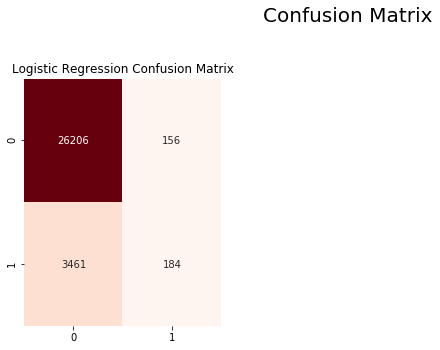

In [106]:
plt.figure(figsize=(12,10))

plt.suptitle("Confusion Matrix",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sm.heatmap(conf,cbar=False,annot=True,cmap="Reds",fmt="d")

In [90]:
score = clr.decision_function(X_test)
sc= pd.DataFrame(data=score,columns =['SCORE']).sort_values('SCORE')
sc

,SCORE
13715,-5.373552
19792,-5.181542
18965,-5.172230
16171,-5.151329
3402,-5.136970
15945,-5.129162
1622,-5.128981
16934,-5.116779
2599,-5.105803
12954,-5.065877


In [107]:
proba = clr.predict_proba(X_test)
pb = pd.DataFrame(data=proba,columns =['risqué avec probabilité','Non risqué avec probabilité']).sort_values('risqué avec probabilité')
pb

,risqué avec probabilité,Non risqué avec probabilité
24973,0.195827,0.804173
11553,0.218514,0.781486
15280,0.222144,0.777856
10991,0.224113,0.775887
7532,0.233014,0.766986
6375,0.240468,0.759532
11801,0.247787,0.752213
12801,0.270528,0.729472
25577,0.270614,0.729386
10080,0.274204,0.725796


In [69]:
import pandas 
Score = clr.decision_function(X_test)
dfsc = pandas.DataFrame(score, columns=['Score']).sort_values('Score')
dfsc['Sinistre'] = y_test.values
dfsc

,Score,Sinistre
3654,-5.252532,0
9442,-5.146602,1
29198,-5.113975,0
14026,-5.060743,0
2203,-5.051314,0
12857,-5.041177,0
21355,-5.036800,0
17049,-5.036452,1
9136,-5.007175,0
3443,-4.997661,0


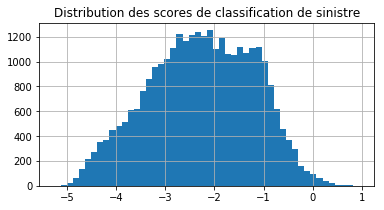

In [116]:
ax = dfsc['Score'].hist(bins=50, figsize=(6,3))
ax.set_title('Distribution des scores de classification de sinistre');

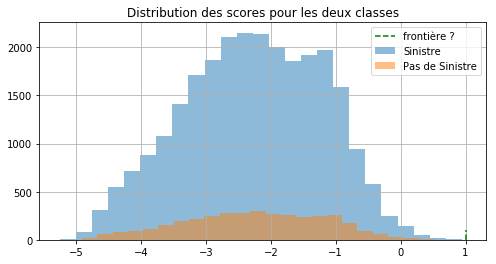

In [109]:
ax = dfsc[dfsc['Sinistre'] == 0]['Score'].hist(bins=25, figsize=(8,4), label='Sinistre', alpha=0.5)
dfsc[dfsc['Sinistre'] == 1]['Score'].hist(bins=25, ax=ax, label='Pas de Sinistre', alpha=0.5)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([1, 1], [0, 100], 'g--', label="frontière ?")
ax.legend();

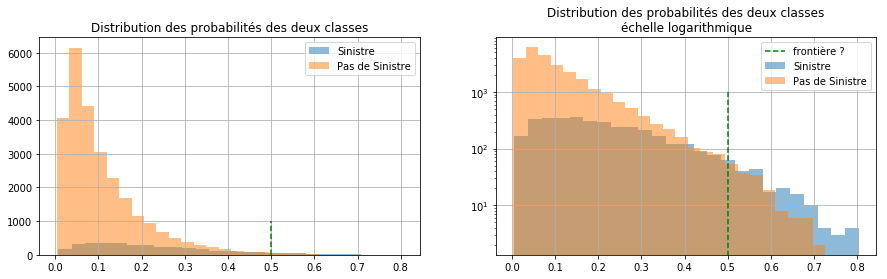

In [110]:
proba = clr.predict_proba(X_test)[:, 1]
dfpr = pandas.DataFrame(proba, columns=['proba'])
dfpr['Sinistre'] = y_test.values
dfpr['Sinistre'] 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15,4))
dfpr[dfpr['Sinistre'] == 1]['proba'].hist(bins=25, label='Sinistre', alpha=0.5, ax=ax[0])
dfpr[dfpr['Sinistre'] == 0]['proba'].hist(bins=25, label='Pas de Sinistre', alpha=0.5, ax=ax[0])
ax[0].set_title('Distribution des probabilités des deux classes')
ax[0].legend();
dfpr[dfpr['Sinistre'] == 1]['proba'].hist(bins=25, label='Sinistre', alpha=0.5, ax=ax[1])
dfpr[dfpr['Sinistre'] == 0]['proba'].hist(bins=25, label='Pas de Sinistre', alpha=0.5, ax=ax[1])
ax[0].plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax[1].plot([0.5, 0.5], [0, 1000], 'g--', label="frontière ?")
ax[1].set_yscale('log')
ax[1].set_title('Distribution des probabilités des deux classes\néchelle logarithmique')
ax[1].legend();

In [111]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
probas = clr.predict_proba(X_test) # On va initialiser les premieres valeurs de faux positifs et vraies positifs
fpr0, tpr0, thresholds0 = roc_curve(y_test, probas[:, 0], pos_label=clr.classes_[0], drop_intermediate=False)
fpr0.shape

(30005,)

In [112]:
dftp = pandas.DataFrame(dict(fpr=fpr0, tpr=tpr0, threshold=thresholds0)).copy()
dftp.head(n=2)

,fpr,tpr,threshold
0,0.0,0.000000,1.996993
1,0.0,0.000038,0.996993


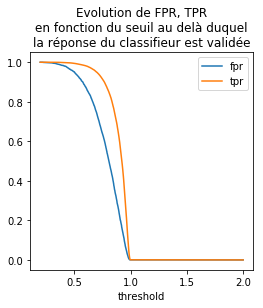

In [113]:
ax = dftp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(4, 4))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" +
             "la réponse du classifieur est validée");

No handles with labels found to put in legend.


0.7584460173531986


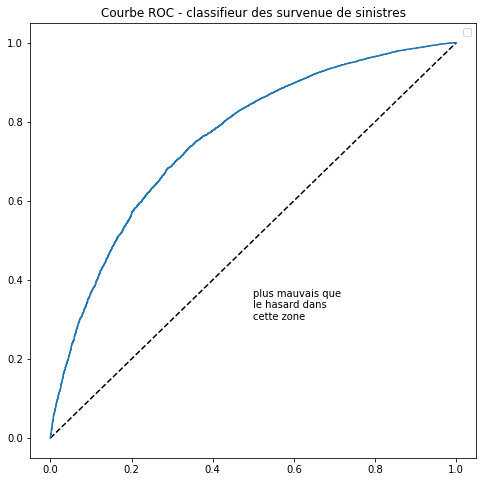

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot([0, 1], [0, 1], 'k--')
# aucf = roc_auc_score(y_test == clr.classes_[0], probas[:, 0]) # première façon
aucf = auc(fpr0, tpr0) 
print(aucf)# seconde façon
ax.plot(fpr0, tpr0)
ax.set_title('Courbe ROC - classifieur des survenue de sinistres')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend();